In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import seaborn as sns

In [4]:
housing_data = pd.read_csv('./datasets/housing.csv')
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing_data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

### column to predict is median_house_value

In [8]:
## random values from the data
housing_data.sample(6)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17735,-121.81,37.30,15.0,1929.0,345.0,1683.0,347.0,5.5248,235600.0,<1H OCEAN
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
16241,-121.29,37.99,30.0,1271.0,528.0,2019.0,524.0,1.5152,81300.0,INLAND
6088,-117.86,34.10,23.0,2535.0,490.0,1327.0,466.0,3.5977,180600.0,<1H OCEAN
15886,-122.38,37.73,18.0,4037.0,990.0,2722.0,834.0,1.4282,140400.0,NEAR BAY
20069,-120.37,38.01,30.0,473.0,NaN,242.0,93.0,2.5417,123200.0,INLAND


In [9]:
housing_data.shape

(20640, 10)

In [11]:
housing_data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [14]:
housing_data.dropna(inplace=True)

In [15]:
housing_data.shape

(20433, 10)

In [16]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


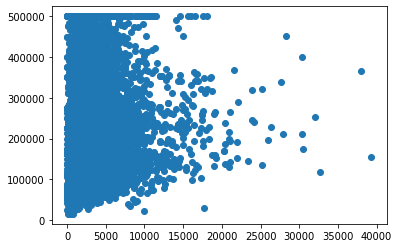

In [18]:
plt.scatter(x=housing_data['total_rooms'], y = housing_data['median_house_value'])

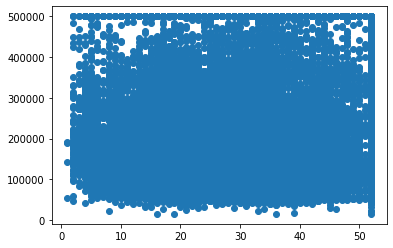

In [19]:
plt.scatter(housing_data['housing_median_age'], housing_data['median_house_value'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000225A7EE9088>,
      dtype=object)

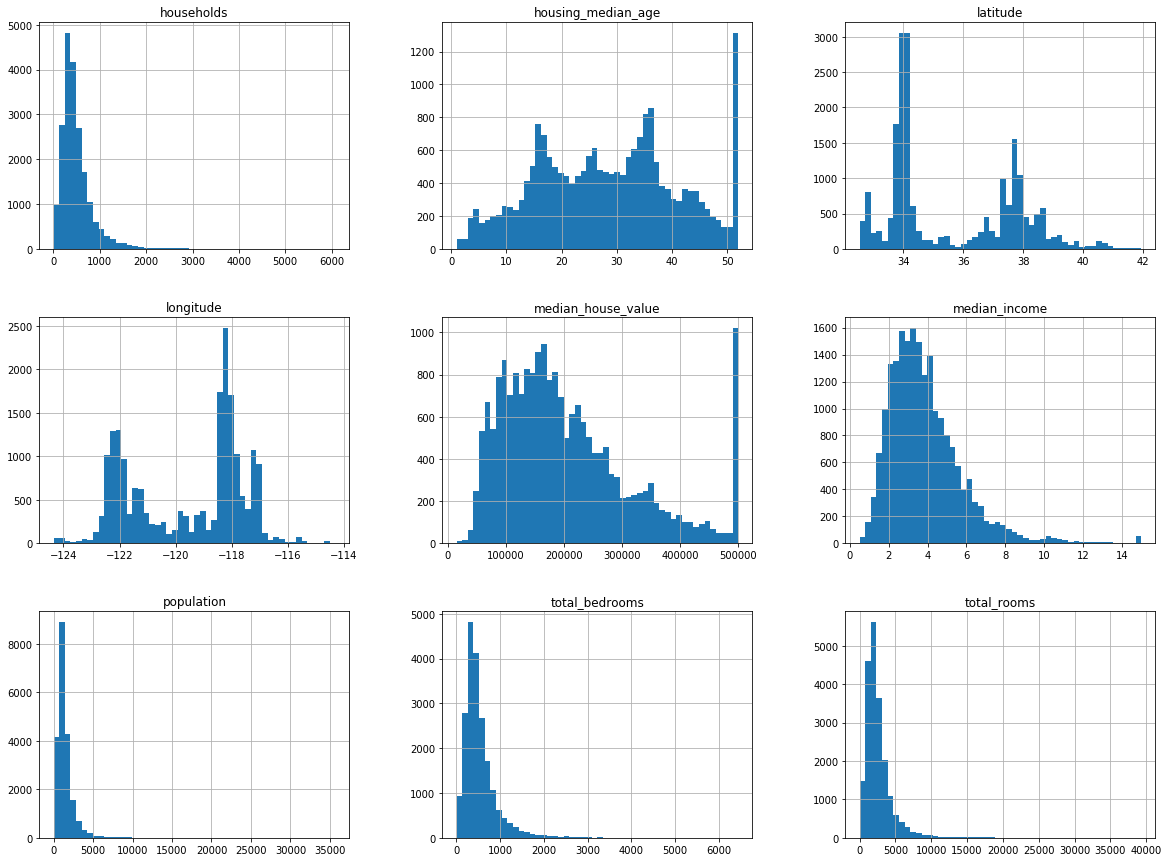

In [23]:
housing_data.hist(bins=50, figsize=(20,15))

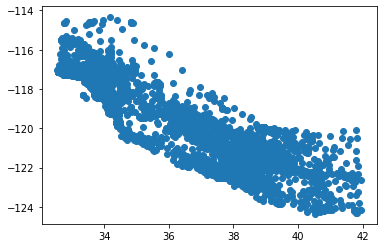

In [24]:
plt.scatter(x=housing_data['latitude'], y= housing_data['longitude'])

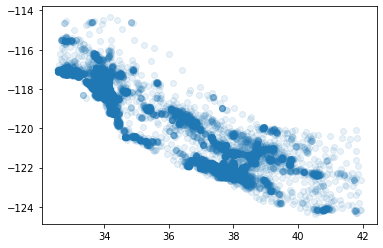

In [26]:
plt.scatter(x=housing_data['latitude'], y= housing_data['longitude'], alpha=0.1)

In [27]:
corr_matrix = housing_data.corr()

In [29]:
## shows how the values is behaving wrt to other values
corr_matrix['median_house_value']

longitude            -0.045398
latitude             -0.144638
housing_median_age    0.106432
total_rooms           0.133294
total_bedrooms        0.049686
population           -0.025300
households            0.064894
median_income         0.688355
median_house_value    1.000000
Name: median_house_value, dtype: float64

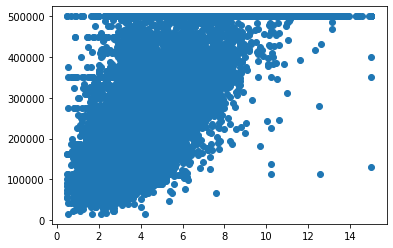

In [30]:
plt.scatter(housing_data['median_income'], housing_data['median_house_value'])

In [31]:
### from the above plots it looks like the upper limit is 500000 and that matters for
## our ML model, lets clean data